# <center>Майнор "Интеллектуальный анализ данных"</center>

# <center>Курс "Введение в анализ данных"</center>

# <center>Лабораторная работа №3. Supervised Learning</center>

## Данные

В рамках данной лабораторной работы вам предлагается проанализировать набор данных о студентах двух школ в Португалии.  
В файле `students_data.csv` представлена информация о студентах, посещающих два курса - математику (`Math`) и поргутальский язык (`Por`). Некоторые студенты представлены в обоих курсах, некоторые - только в одном. Для каждого студента известны три оценки по курсу: оценка за первое полугодие (`G1`), оценка за второе полугодие (`G2`) и итоговая оценка за год (`G3`).

In [5]:
import pandas as pd

In [6]:
pd.set_option('display.max_columns', 40)

pd.set_option('display.max_colwidth', None)

In [7]:
data = pd.read_csv("students_data.csv")

data.shape

(1044, 36)

In [8]:
data.head(15)

,ID,Subject,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,cheating,G1,G2,G3
0,100097,Por,GP,F,16,U,GT3,A,3,4,services,other,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3.0,2,1,1.0,4.0,5,12,NaN,15,13,14
1,101021,Por,GP,F,17,U,GT3,T,3,2,other,other,course,mother,1,2,0,no,no,no,yes,no,yes,yes,no,5.0,3,4,1.0,3.0,3,2,NaN,17,18,17
2,102965,Por,GP,M,16,U,LE3,T,1,2,health,services,course,mother,2,1,2,no,no,no,no,no,yes,yes,no,4.0,4,5,3.0,5.0,5,0,yes,9,8,10
3,102989,Por,MS,M,17,U,GT3,T,2,3,other,services,home,father,2,2,0,no,no,no,yes,yes,yes,yes,no,4.0,4,3,1.0,1.0,3,4,no,14,15,16
4,103131,Por,GP,F,16,U,GT3,T,1,1,at_home,other,home,mother,2,1,0,no,yes,no,no,yes,yes,no,NaN,4.0,3,2,1.0,4.0,5,2,yes,12,13,13
5,103144,Por,GP,M,18,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,yes,yes,yes,yes,yes,3.0,3,4,4.0,5.0,4,2,NaN,11,11,12
6,105257,Por,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1.0,1,1,1.0,1.0,5,6,NaN,11,12,9
7,107639,Por,MS,F,15,R,GT3,T,4,4,teacher,other,course,mother,2,1,0,no,no,no,no,yes,yes,yes,yes,1.0,5,1,3.0,5.0,5,0,NaN,13,14,14
8,107914,Math,GP,F,15,U,LE3,T,3,2,services,other,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4.0,4,4,1.0,1.0,5,10,no,7,6,6
9,108089,Por,MS,M,16,R,GT3,T,3,4,other,health,other,mother,3,2,0,no,no,no,no,no,yes,no,no,3.0,4,5,1.0,2.0,5,4,NaN,9,10,11


### Признаки

Данные представлены признаками различных типов: числовыми, категориальными, упорядоченными категориальными.

**Описание признаков:**

In [9]:
pd.read_csv('students_data_features.csv',
            delimiter=';',
            encoding='windows-1251')

,Признак,Описание
0,ID,Уникальный номер наблюдения
1,Subject,"Предмет: 'Math' - математика, 'Por' - португальский язык"
2,school,"Школа: 'GP' - Gabriel Pereira, 'MS' - Mousinho da Silveira"
3,sex,"Пол студента: 'F' - женский, 'M' - мужской"
4,age,Возраст студента
5,address,"Место проживания студента: 'U' - в городе, 'R' - за городом"
6,famsize,"Число членов семьи: 'LE3' - если <= 3, 'GT3' - если > 3"
7,Pstatus,"Отношения родителей: 'T' - живут вместе, 'A' - живут раздельно"
8,Medu,"Образование матери: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"
9,Fedu,"Образование отца: 0 - без образования, 1 - начальная школа, 2 – от 5 до 9 классов, 3 – среднее образование, 4 – высшее образование"


## Часть 1. Предобработка данных

* Разделите данные на две части - данные для моделирования (80%) и отложенную выборку (20%). Убедитесь, что распределение целевой переменной (`G3`) одинаково в обоих частях.  
  __NB__: Отложенную выборку нужно использовать только для финальной оценки качества модели. Обучение и кросс-валидацию следует проводить на данных для моделирования.  
* Выполните необходимые преобразования данных: исправление ошибок, удаление выбросов и пропусков, приведение признаков к числовому виду.  
* Оцените значимость признаков для определения итоговой оценки за курс. Исключите из выборки незначимые на ваш взгляд признаки, обоснуйте свое решение. 
* (Опционально) Feature engineering: создайте новые признаки (значимые) на основе уже имеющихся.
  
**Tip:** Используйте свои наработки из Лабораторной работы №1.

### 1. Поиск и исправление опечаток:

In [10]:
numerics = ["ID", "age", "failures", "absences", "G1", "G2", "G3"]

categorials = ["Subject", "school", "sex", "address", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup",
              "paid", "activities", "nursery", "higher", "internet", "romantic", "cheating"]

sorted_categorials = ["famsize", "Medu", "Fedu", "traveltime", "studytime", "famrel", "freetime", "goout", "Dalc",
                     "Walc", "health"]

data.loc[:, "famsize"].replace("LE3", 3, inplace=True)
data.loc[:, "famsize"].replace("GT3", 4, inplace=True)

print("Категориальные признаки\n")
for key, value in data.loc[:, categorials].items():
    print(key, "unique values:", value.unique())

print("\nУпорядоченные категориальные признаки\n")
for key, value in data.loc[:, sorted_categorials].items():
    print(key, "unique values:", value.unique())

data.loc[:, "sex"].replace("m", "M", inplace=True)
data.loc[:, "Pstatus"].replace("t", "T", inplace=True)
data.replace("at-home", "at_home", inplace=True)
data.loc[:, "guardian"].replace("futher", "father", inplace=True)
data.replace("no", False, inplace=True)
data.replace("yes", True, inplace=True)
data.replace("o", "0", inplace=True)

Категориальные признаки

Subject unique values: ['Por' 'Math']
school unique values: ['GP' 'MS']
sex unique values: ['F' 'M' 'm']
address unique values: ['U' 'R']
Pstatus unique values: ['A' 'T' 't']
Mjob unique values: ['services' 'other' 'health' 'at_home' 'teacher' 'at-home']
Fjob unique values: ['other' 'services' 'health' 'at-home' 'teacher' 'at_home']
reason unique values: ['course' 'home' 'reputation' 'other']
guardian unique values: ['father' 'mother' 'other' 'futher']
schoolsup unique values: ['no' 'yes']
famsup unique values: ['no' 'yes']
paid unique values: ['no' 'yes']
activities unique values: ['no' 'yes']
nursery unique values: ['yes' 'no']
higher unique values: ['yes' 'no']
internet unique values: ['yes' 'no']
romantic unique values: ['no' nan 'yes']
cheating unique values: [nan 'yes' 'no']

Упорядоченные категориальные признаки

famsize unique values: [4 3]
Medu unique values: ['3' '1' '2' '4' '0' 'o']
Fedu unique values: ['4' '2' '3' '1' 'o' '0']
traveltime unique valu

### 2. Проверка пропущенных значений в файле

In [11]:
feature_na = []
for item in data.items():
    miss_count = list(item[1].isna().values).count(True)
    if miss_count:
        feature_na.append(item[0])
        print(f"{item[0]} количество пропущенных значений: {miss_count}")

romantic количество пропущенных значений: 10
famrel количество пропущенных значений: 10
Dalc количество пропущенных значений: 10
Walc количество пропущенных значений: 10
cheating количество пропущенных значений: 700


In [12]:
for feature in feature_na:
    md = data.loc[:, feature].dropna().median()
    if feature == "romantic": md = bool(md)
    data.loc[:, feature].fillna(md, inplace=True)
    print(f"{feature} среднее значение вместо Na = {md}")

romantic среднее значение вместо Na = False
famrel среднее значение вместо Na = 4.0
Dalc среднее значение вместо Na = 1.0
Walc среднее значение вместо Na = 2.0
cheating среднее значение вместо Na = 1.0


### 3. Удаление неважных признаков

На мой взгляд следующие признаки не должны сильно влиять на результат G3:
* age - хотелось бы, чтобы оценка не зависила от этого признака, поэтому исключим этот признак
* address - место жительства учащегося
* ID может помешать при построении модели, поэтому его уберу чуть позже

In [13]:
data = data.drop(['age', 'address', 'traveltime', 'health'], axis=1)
numerics.remove('age')
categorials.remove('address')
sorted_categorials.remove('health')
sorted_categorials.remove('traveltime')

Можно преобразовать признаки schoolsup и famsup в один:

In [14]:
data['support'] = data['schoolsup'] | data['famsup']
data = data.drop(['schoolsup', 'famsup'], axis=1)
categorials.remove('schoolsup')
categorials.remove('famsup')
categorials.append('support')

### 3. Удаление выбросов

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

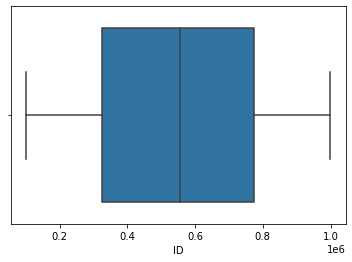

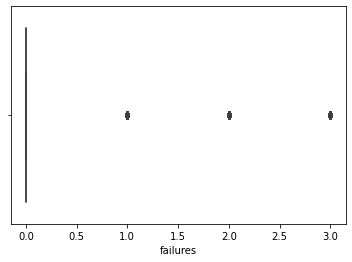

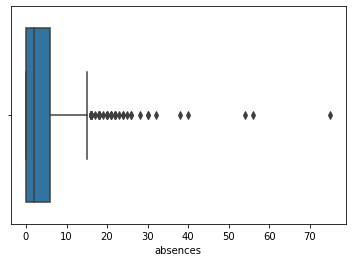

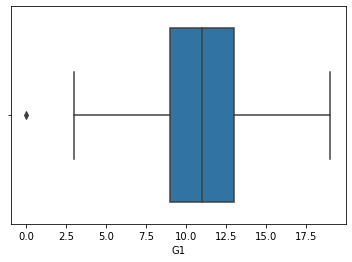

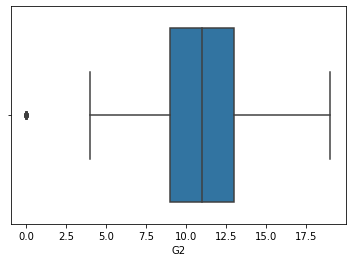

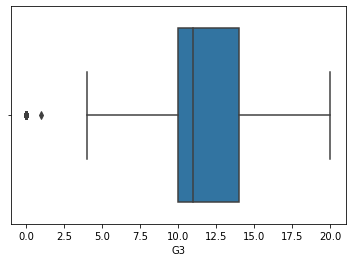

In [16]:
for c in numerics:
    sns.boxplot(x = data[c])
    plt.show()

Из боксплотов видно, что выбросы присутствуют в следующих численных столбцах: 
* age
* failures
* absences
* G1
* G2
* G3

Произведем удаление выбросов, чтобы они не помешали в линейной регрессии.

* Вычисление первый и третий квартили (Q1 и Q3).
* Оценка интерквартильного размаха, IQR = Q3-Q1.
* Оценика нижней границы, нижняя граница = Q1*1,5
* Оценка верхней границ, верхняя граница = Q3*1,5
* Замена точек данных, которые лежат за пределами нижней и верхней границы, значением NULL.

In [17]:
for col in numerics:
    for x in [col]:
        q75,q25 = np.percentile(data.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        data.loc[data[x] < min,x] = np.nan
        data.loc[data[x] > max,x] = np.nan

Посмотрим, сколько выбросов получилось:

In [18]:
data[numerics].isnull().sum()

ID            0
failures    183
absences     54
G1            1
G2           20
G3           54
dtype: int64

Удаляем:

In [19]:
data = data.dropna(axis = 0, how ='any')

Проверяем:

In [20]:
data.isnull().sum()

ID            0
Subject       0
school        0
sex           0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
studytime     0
failures      0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
absences      0
cheating      0
G1            0
G2            0
G3            0
support       0
dtype: int64

Осталось поправить индексы:

In [21]:
data.reset_index(inplace = True, drop = True)

### 4. Приведение к числовому типу

Замена категориальных признаков

In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
for categorial in categorials:
    ohe = OneHotEncoder(sparse=False)
    ohe_ftrs = ohe.fit_transform(data[categorial].values.reshape(-1,1))
    tmp = pd.DataFrame(ohe_ftrs, columns = [categorial + str(i) for i in range(ohe_ftrs.shape[1])])
    data = pd.concat([data, tmp], axis=1)
    data = data.drop(categorial, axis=1)

In [24]:
data.columns.values.tolist()

['ID',
 'famsize',
 'Medu',
 'Fedu',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'absences',
 'G1',
 'G2',
 'G3',
 'Subject0',
 'Subject1',
 'school0',
 'school1',
 'sex0',
 'sex1',
 'Pstatus0',
 'Pstatus1',
 'Mjob0',
 'Mjob1',
 'Mjob2',
 'Mjob3',
 'Mjob4',
 'Fjob0',
 'Fjob1',
 'Fjob2',
 'Fjob3',
 'Fjob4',
 'reason0',
 'reason1',
 'reason2',
 'reason3',
 'guardian0',
 'guardian1',
 'guardian2',
 'paid0',
 'paid1',
 'activities0',
 'activities1',
 'nursery0',
 'nursery1',
 'higher0',
 'higher1',
 'internet0',
 'internet1',
 'romantic0',
 'romantic1',
 'cheating0',
 'cheating1',
 'support0',
 'support1']

Замена упорядоченных категориальных признаков:

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
for sorted_categorial in sorted_categorials:
    data[sorted_categorial] = pd.to_numeric(data[sorted_categorial])

Убеждаемся, что теперь все признаки имеют числовой тип:

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           803 non-null    float64
 1   famsize      803 non-null    int64  
 2   Medu         803 non-null    int64  
 3   Fedu         803 non-null    int64  
 4   studytime    803 non-null    int64  
 5   failures     803 non-null    float64
 6   famrel       803 non-null    float64
 7   freetime     803 non-null    int64  
 8   goout        803 non-null    int64  
 9   Dalc         803 non-null    float64
 10  Walc         803 non-null    float64
 11  absences     803 non-null    float64
 12  G1           803 non-null    float64
 13  G2           803 non-null    float64
 14  G3           803 non-null    float64
 15  Subject0     803 non-null    float64
 16  Subject1     803 non-null    float64
 17  school0      803 non-null    float64
 18  school1      803 non-null    float64
 19  sex0    

### 6. Разделение данных

In [187]:
from sklearn.model_selection import train_test_split

Данные с G1:

In [188]:
X = data.drop(['G3', 'G2', 'ID'], axis=1)
y = data['G3']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [190]:
X_train.shape, X_test.shape

((642, 53), (161, 53))

Данные без G1:

In [191]:
X = data.drop(['G3', 'G2', 'G1', 'ID'], axis=1)
y = data['G3']

In [192]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

К сожалению, я не смогла имортировать функцию mean_absolut_percentage_error, поэтому добавлю эту функцию вручную:

In [99]:
import numpy as np

In [100]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

## Часть 2. Регрессия

* Решите задачу регрессии: постройте модель, предсказывающую итоговую оценку, которую получит студент по предмету (`G3`). При решении задачи **нельзя** использовать признак `G2`.  
<br>  
* Для решения задачи примените следующие методы:  
  * Линейная регрессия + регуляризации  
  * Полиномиальная регрессия  
  * KNN  
  * Деревья решений, Random Forest  
  
  Для каждого метода выполните настройку гиперпараметров на кросс-валидации.  
<br>    
* Оцените качество каждой модели на отложенной выборке, используйте различные метрики. Сравните модели и сделайте вывод о качестве решения задачи.  
<br>    
* Задачу необходимо решить в двух вариантах: с использованием признака `G1`  и без него. Сравните качество решений в двух случаях.  
<br>    
* В регрессионных моделях попробуйте дать интерпретацию весам признаков. 

### 1. Линейная регрессия

а) Сначала построим модель с использованием столбца G1:

In [193]:
import seaborn as sns

In [194]:
from sklearn.linear_model import LinearRegression

In [195]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [196]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [197]:
print("Test:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Test:
MSE: 1.6056974057270132
MAE: 1.0247544946137421
R2: 0.7958279825078247
MAPE:  8.773989940662826


In [198]:
d = pd.DataFrame(y_test)
d.insert(1, 'G3_pred', y_pred)
pd.set_option('display.max_rows', None)
d

,G3,G3_pred
261,11.0,11.064575
672,13.0,14.041260
184,10.0,9.355713
574,16.0,15.179077
776,11.0,12.688477
57,16.0,16.195435
370,16.0,14.849731
529,13.0,12.139648
447,12.0,12.620117
760,13.0,12.638062


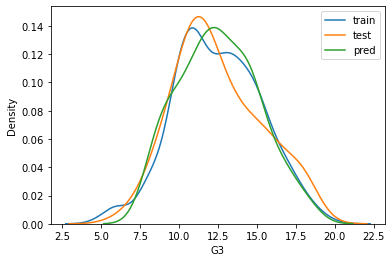

In [199]:
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_pred, label='pred')
plt.legend()
plt.show()

Модель показала достаточно неплохие результаты

б) Теперь посмотрим какие результаты получатся при удалении столбца G1:

In [200]:
lr = LinearRegression()
lr.fit(X_train_2, y_train_2)
y_pred = lr.predict(X_test_2)

In [201]:
print("Test:")
print('MSE:', mean_squared_error(y_test_2, y_pred))
print('MAE:', mean_absolute_error(y_test_2, y_pred))
print('R2:', r2_score(y_test_2, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test_2, y_pred))

Test:
MSE: 5.656837581847766
MAE: 1.8872161296583851
R2: 0.11064881692033968
MAPE:  15.528277117990092


In [202]:
d = pd.DataFrame(y_test)
d.insert(1, 'G3_pred', y_pred)
pd.set_option('display.max_rows', None)
d

,G3,G3_pred
261,11.0,12.630859
672,13.0,13.519531
184,10.0,13.298828
574,16.0,12.626953
776,11.0,8.673828
57,16.0,14.507812
370,16.0,11.402344
529,13.0,13.273438
447,12.0,12.400391
760,13.0,11.146484


Результаты плачевные :_)

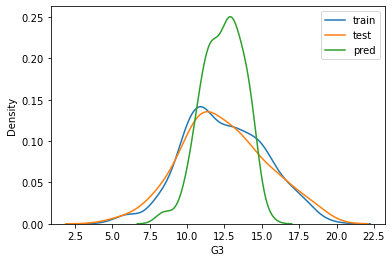

In [203]:
sns.kdeplot(y_train_new, label='train')
sns.kdeplot(y_test_new, label='test')
sns.kdeplot(y_pred, label='pred')
plt.legend()
plt.show()

Результаты ухудшились без столбца G1.

#### Регуляриазция

Ridge:

In [204]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [205]:
ridge_table = pd.DataFrame(columns=['lambda', 'r2_train', 'r2_test'])
for l in [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]:
    ridge = Ridge(alpha=l)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    y_train_pred = ridge.predict(X_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    ridge_table = ridge_table.append(pd.DataFrame([[l, r2_train, r2_test]], columns=['lambda', 'r2_train', 'r2_test']))

In [206]:
ridge_table

,lambda,r2_train,r2_test
0,0,0.661038,0.676683
0,0.1,0.791727,0.795774
0,0.5,0.791727,0.795846
0,1,0.791727,0.795934
0,5,0.791709,0.796574
0,10,0.791663,0.797245
0,25,0.791436,0.798726
0,50,0.790913,0.800233
0,100,0.789673,0.801653
0,250,0.785559,0.801621


In [207]:
lambdas = [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]
ridgecv = RidgeCV(alphas=lambdas, cv=10)
ridgecv.fit(X_train, y_train)
y_pred = ridgecv.predict(X_test)

In [208]:
print("Test:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Test:
MSE: 1.5601392598455297
MAE: 1.0193432061403254
R2: 0.8016209161730652
MAPE:  8.739872101804927


In [209]:
ridgecv.alpha_

250.0

Lasso:

In [210]:
lasso_table = pd.DataFrame(columns=['lambda', 'r2_train', 'r2_test'])
for l in [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]:
    lasso = Lasso(alpha=l)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    y_train_pred = lasso.predict(X_train)
    r2_test = r2_score(y_test, y_pred)
    r2_train = r2_score(y_train, y_train_pred)
    lasso_table = lasso_table.append(pd.DataFrame([[l, r2_train, r2_test]], columns=['lambda', 'r2_train', 'r2_test']))

<ipython-input-210-d17732afdc7b>:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 506.127205077059, tolerance: 0.4860236760124611
  model = cd_fast.enet_coordinate_descent(


In [211]:
lasso_table

,lambda,r2_train,r2_test
0,0,0.791727,7.957553e-01
0,0.1,0.774537,7.961042e-01
0,0.5,0.768431,7.900466e-01
0,1,0.754443,7.753035e-01
0,5,0.325170,3.332799e-01
0,10,0.000000,-2.822618e-07
0,25,0.000000,-2.822618e-07
0,50,0.000000,-2.822618e-07
0,100,0.000000,-2.822618e-07
0,250,0.000000,-2.822618e-07


In [212]:
lambdas = [0, 0.1, 0.5, 1, 5, 10, 25, 50, 100, 250, 500, 1000, 5000, 10000]
lassocv = LassoCV(alphas=lambdas, cv=10)
lassocv.fit(X_train, y_train)
y_pred = lassocv.predict(X_test)

C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 436.862552623998, tolerance: 0.4319833622183708
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 449.638925795452

Регуляризация позволила повысить качество предсказания.

### 2. Полиномиальная регрессия

a) Данные со столбцом G1:

In [213]:
from sklearn.preprocessing import PolynomialFeatures

In [214]:
poly = PolynomialFeatures(degree=1, include_bias=False)
poly.fit(X_train)

PolynomialFeatures(degree=1, include_bias=False)

In [215]:
poly_train = poly.transform(X_train)
poly_test = poly.transform(X_test)

In [216]:
print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 53
Number of features after polynomial transformation: 53


In [217]:
regressionModel = LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

LinearRegression(normalize=True)

In [218]:
y_pred = regressionModel.predict(poly_test)

In [219]:
poly_test.shape

(161, 53)

In [220]:
print("Test:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Test:
MSE: 1.5422563256684296
MAE: 1.0068177406832297
R2: 0.8038948158110639
MAPE:  8.610320718651888


Полиномиальная регрессия улучшиила каство модели

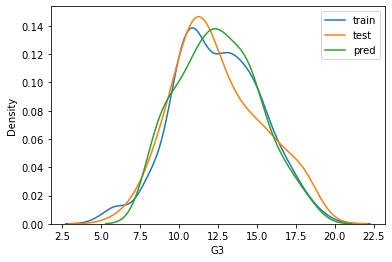

In [221]:
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_pred, label='pred')
plt.legend()
plt.show()

б) Без G1:

In [222]:
poly.fit(X_train_2)

PolynomialFeatures(degree=1, include_bias=False)

In [223]:
poly_train = poly.transform(X_train_2)
poly_test = poly.transform(X_test_2)

In [224]:
print('Original number of features:', X_train.shape[1])
print('Number of features after polynomial transformation:', poly_train.shape[1])

Original number of features: 53
Number of features after polynomial transformation: 52


In [225]:
regressionModel = LinearRegression(normalize=True)
regressionModel.fit(poly_train, y_train)

LinearRegression(normalize=True)

In [226]:
y_pred = regressionModel.predict(poly_test)

In [227]:
poly_test.shape

(161, 52)

In [228]:
print("Test:")
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

Test:
MSE: 8.27928474378882
MAE: 2.3245341614906834
R2: -0.05275020281058995
MAPE:  19.710774717438994


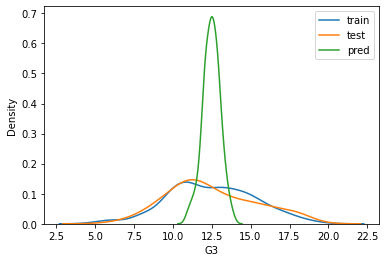

In [229]:
sns.kdeplot(y_train, label='train')
sns.kdeplot(y_test, label='test')
sns.kdeplot(y_pred, label='pred')
plt.legend()
plt.show()

Увы и ах!

### 3. KNN

а) Сo столбцом G1:

In [230]:
from sklearn.neighbors import KNeighborsRegressor

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #, mean_absolute_percentage_error

In [233]:
r2_max, neighbors_max = 0, 0
for i in range(1, 100):
    knnr = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    knnr.fit(X_train, y_train)
    y_pred = knnr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > r2_max:
        r2_max, neighbors_max = r2, i

In [234]:
r2_max, neighbors_max

(0.7740199848911475, 10)

In [235]:
knnr = KNeighborsRegressor(n_neighbors=12, weights='uniform')
knnr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=12)

In [236]:
 y_pred = knnr.predict(X_test)

In [237]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test, y_pred))

MSE: 1.8165545203588684
MAE: 1.0936853002070392
R2: 0.7690165033689689
MAPE:  9.40349878480852


In [238]:
d = pd.DataFrame(y_test)
d.insert(1, 'G3_pred', y_pred)
pd.set_option('display.max_rows', None)
d

,G3,G3_pred
261,11.0,11.250000
672,13.0,13.166667
184,10.0,10.500000
574,16.0,15.416667
776,11.0,12.333333
57,16.0,16.166667
370,16.0,13.416667
529,13.0,12.000000
447,12.0,12.833333
760,13.0,12.750000


б) Те же манипуляции для данных с отсутствующим столбцом G1:

In [239]:
r2_max, neighbors_max = 0, 0
for i in range(1, 100):
    knnr = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    knnr.fit(X_train_new, y_train_2)
    y_pred = knnr.predict(X_test_2)
    r2 = r2_score(y_test_2, y_pred)
    if r2 > r2_max:
        r2_max, neighbors_max = r2, i

In [240]:
r2_max, neighbors_max

(0, 0)

In [241]:
print('MSE:', mean_squared_error(y_test_new, y_pred))
print('MAE:', mean_absolute_error(y_test_new, y_pred))
print('R2:', r2_score(y_test_new, y_pred))
print('MAPE: ', mean_absolute_percentage_error(y_test_new, y_pred))

MSE: 8.126988563088696
MAE: 2.3197816676077547
R2: 0.013091014720632899
MAPE:  20.571078098426458


Никогда такого не было, и вот опять!

### 4. Random forests / Desision tries

а) Для данных с G1:

In [242]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [243]:
tree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=5, min_samples_split=5)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)


In [244]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MSE: 2.190997614958513
MAE: 1.209344348230971
R2: 0.7214042933798719
MAPE: 10.425204918645095


In [245]:
tree.feature_importances_

array([0.        , 0.00521326, 0.00782378, 0.00099242, 0.        ,
       0.00137627, 0.        , 0.00342794, 0.        , 0.        ,
       0.00515733, 0.95486145, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00221172, 0.        ,
       0.        , 0.        , 0.        , 0.00300589, 0.        ,
       0.        , 0.        , 0.        , 0.00214907, 0.        ,
       0.        , 0.        , 0.00207287, 0.        , 0.        ,
       0.        , 0.00278955, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.0021279 ,
       0.        , 0.        , 0.        , 0.        , 0.00455297,
       0.        , 0.00223755, 0.        ])

б) Без признака G1:

In [246]:
tree = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=5, min_samples_split=5)
tree.fit(X_train_2, y_train_2)
y_pred = tree.predict(X_test_2)


In [247]:
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))

MSE: 9.737918774942132
MAE: 2.513883023966786
R2: -0.23822241685360623
MAPE: 21.303772367476437


Все модели работают лучше с данными, в которых есть G1. 

Лучший результат R2 оказался у полиномиальной регрессии.

## Часть 3. Бинарная классификация

Решите задачу бинарной классификации: постройте модель, предсказывающую, сдаст студент предмет (`G3` >= 8) или не сдаст (`G3` < 8). <br>При решении задачи **нельзя** использовать признаки `G1` и `G2`.  


### Задание 1  
  
* Постройте дерево решений глубины 5 (остальные параметры по умолчанию), оцените качество на 5-fold валидации.  
* Для одного из деревьев (т.е. обученного на одной из итераций кросс-валидации) выведите само дерево - постройте график или выведите в текстовом виде. По структуре дерева сформулируйте правила, по которым принимается решение.  
* Сравните между собой деревья решений, полученных на различных итерациях 5-fold валидации. Сделайте вывод, насколько сильно они похожи или различаются между собой. 

In [248]:
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

In [249]:
y = [int(i >= 8) for i in data['G3']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((642, 52), (161, 52))

In [251]:
kf = KFold(n_splits=5)
param = [{'max_depth': [5]}]
tree = GridSearchCV(DecisionTreeClassifier(), param, cv=kf, verbose=4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
y_pred_proba = tree.predict_proba(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.961, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.930, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.953, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.938, total=   0.0s
[CV] max_depth=5 .....................................................
[CV] ......................... max_depth=5, score=0.953, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [252]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average='macro'))
print("Precision: ", precision_score(y_test, y_pred, average='macro'))
print("F1: ", f1_score(y_test, y_pred, average='macro'))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy:  0.9565217391304348
Recall:  0.7311320754716981
Precision:  0.5681818181818182
F1:  0.5999290024849131
ROC AUC:  0.9433962264150944


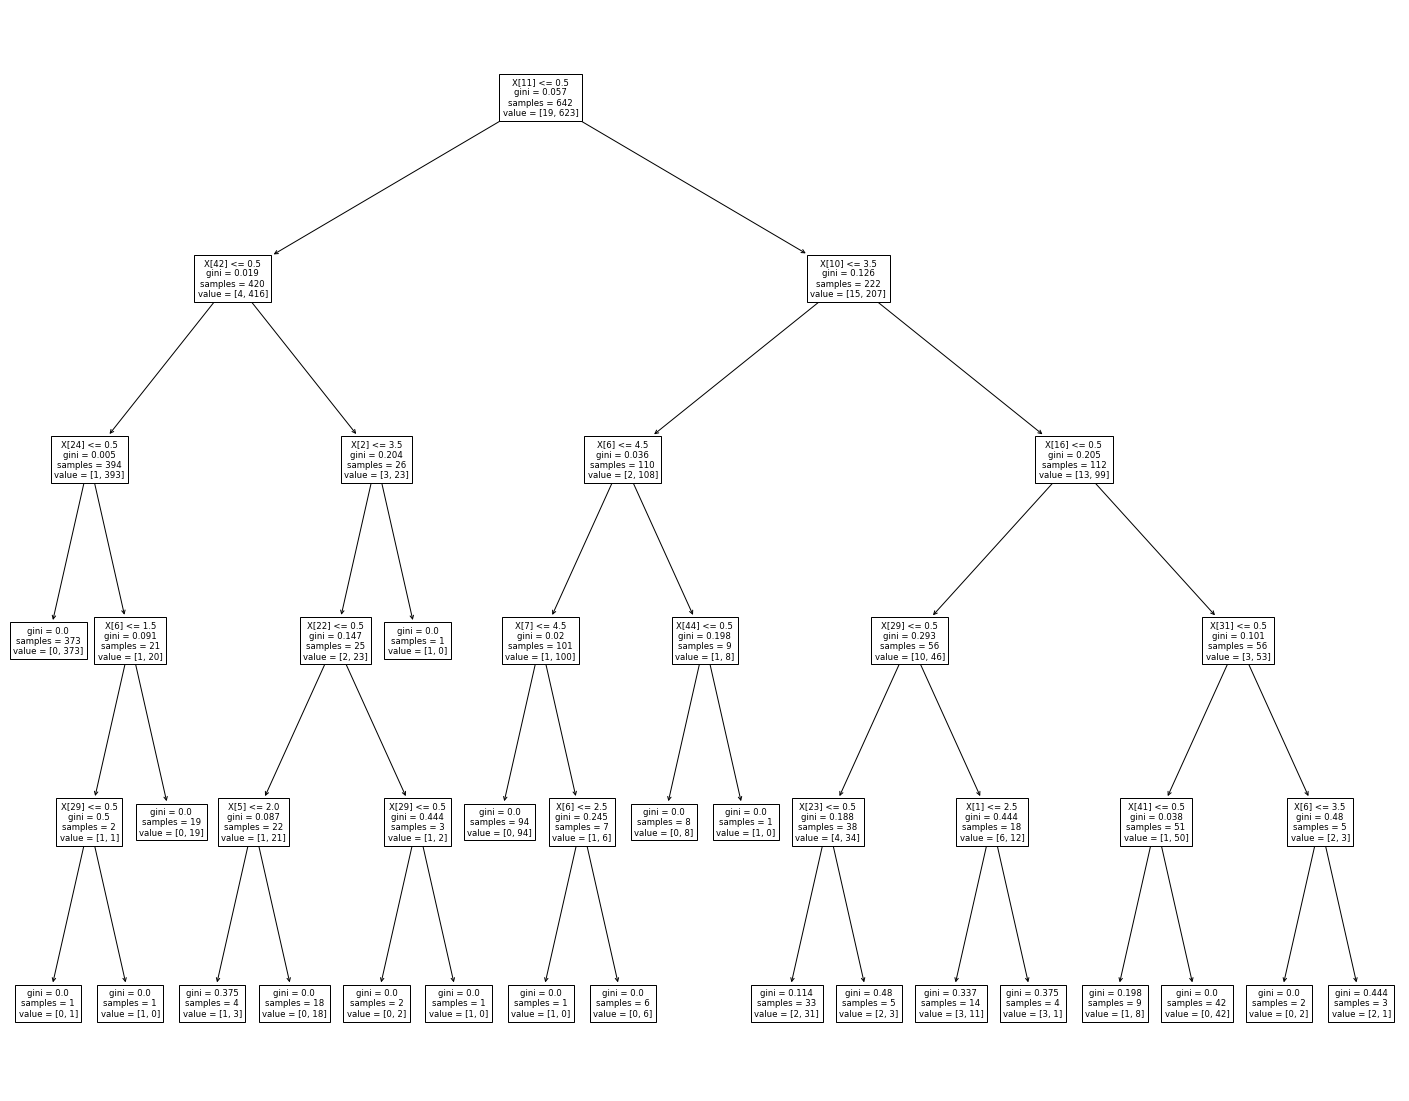

In [253]:
fig = plt.figure(figsize=(25,20))
plot_tree(tree.best_estimator_)
plt.show()

In [254]:
tree.cv_results_

{'mean_fit_time': array([0.00461063]),
 'std_fit_time': array([0.001248]),
 'mean_score_time': array([0.00180645]),
 'std_score_time': array([0.00076047]),
 'param_max_depth': masked_array(data=[5],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 5}],
 'split0_test_score': array([0.96124031]),
 'split1_test_score': array([0.93023256]),
 'split2_test_score': array([0.953125]),
 'split3_test_score': array([0.9375]),
 'split4_test_score': array([0.953125]),
 'mean_test_score': array([0.94704457]),
 'std_test_score': array([0.01139478]),
 'rank_test_score': array([1])}

### Задание 2  
  
На кросс-валидации (5-fold из 2 повторений) оцените, как меняется качество модели Random Forest с ростом числа деревьев (при дефолтных значениях остальных параметров). Провизуализируйте результаты. Сколько деревьев достаточно в данном случае и почему?  
**NB:** В сравнение включите конфигурацию, аналогичную простому дереву решений. 

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedKFold

In [176]:
param = {'n_estimators': range(10, 101, 20)}
rkf = RepeatedKFold(n_splits=5, n_repeats=2)
grid = RandomizedSearchCV(RandomForestClassifier(), param, n_iter=20, cv=rkf, verbose=4)
grid.fit(X_train, y_train)

C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 5 is smaller than n_iter=20. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.984, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.977, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.984, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.977, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=1.000, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.977, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ...........

C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector 

[CV] ..................... n_estimators=30, score=0.969, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.992, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.992, total=   0.0s
[CV] n_estimators=30 .................................................
[CV] ..................... n_estimators=30, score=0.992, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.992, total=   0.1s
[CV] n_estimators=50 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=50, score=0.969, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.992, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.969, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=1.000, total=   0.1s
[CV] n_estimators=50 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=50, score=0.992, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.969, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.992, total=   0.1s
[CV] n_estimators=50 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=50, score=0.992, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.984, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.984, total=   0.1s
[CV] n_estimators=70 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=70, score=0.977, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.984, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.992, total=   0.1s
[CV] n_estimators=70 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=70, score=1.000, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=1.000, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.969, total=   0.1s
[CV] n_estimators=70 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=70, score=0.992, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.992, total=   0.1s
[CV] n_estimators=70 .................................................
[CV] ..................... n_estimators=70, score=0.977, total=   0.1s
[CV] n_estimators=90 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=90, score=0.992, total=   0.1s
[CV] n_estimators=90 .................................................
[CV] ..................... n_estimators=90, score=0.977, total=   0.1s
[CV] n_estimators=90 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=90, score=0.992, total=   0.1s
[CV] n_estimators=90 .................................................
[CV] ..................... n_estimators=90, score=0.969, total=   0.2s
[CV] n_estimators=90 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=90, score=1.000, total=   0.2s
[CV] n_estimators=90 .................................................
[CV] ..................... n_estimators=90, score=0.977, total=   0.2s
[CV] n_estimators=90 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=90, score=0.969, total=   0.1s
[CV] n_estimators=90 .................................................
[CV] ..................... n_estimators=90, score=0.984, total=   0.1s
[CV] n_estimators=90 .................................................
[CV] ..................... n_estimators=90, score=0.992, total=   0.1s
[CV] n_estimators=90 .................................................


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] ..................... n_estimators=90, score=0.977, total=   0.1s


C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished
C:\Users\Polina\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=None),
                   estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'n_estimators': range(10, 101, 20)},
                   verbose=4)

In [177]:
y_pred = grid.predict(X_test)
y_pred_proba = grid.predict_proba(X_test)

In [178]:
method = 'macro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy:  0.9937888198757764
Recall:  0.8333333333333333
Precision:  0.9968553459119497
F1:  0.898422712933754
ROC AUC:  1.0


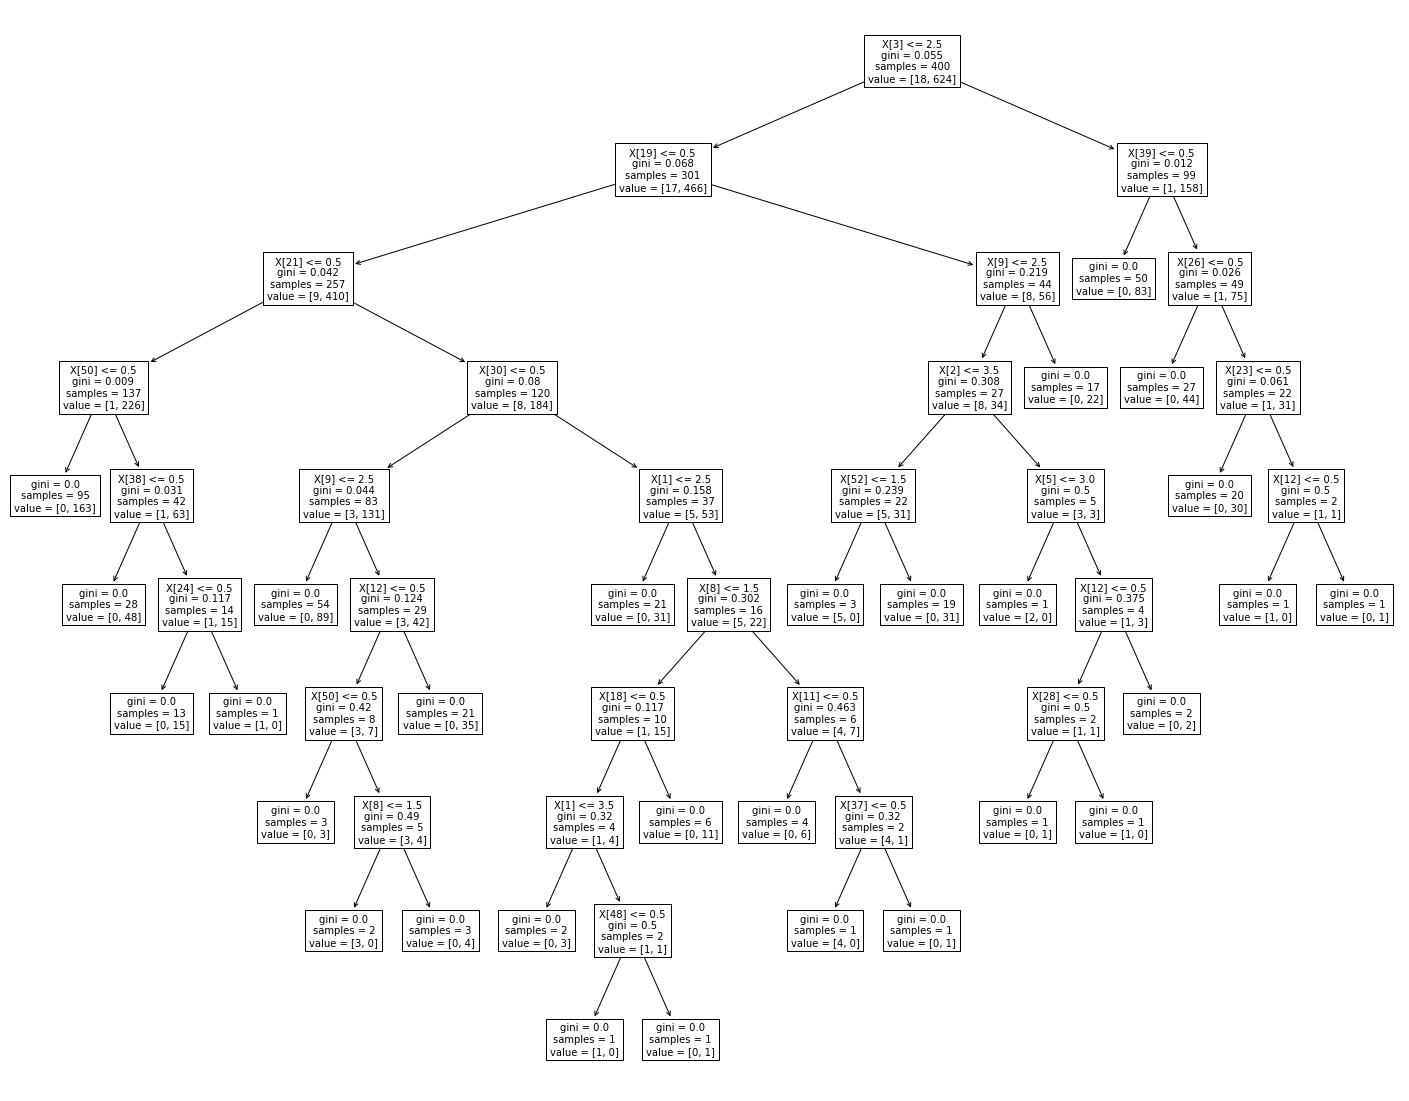

In [179]:
fig = plt.figure(figsize=(25,20))
plot_tree(grid.best_estimator_[0])
plt.show()

### Задание 3  
  
* Настройте гиперпараметры модели Random Forest на 5-fold валдиации. В качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.
* Обучите Random Forest  с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество (F1-score) всего ансамбля и <u>каждого дерева отдельно</u>. Постройте график распределения качества деревьев в ансамбле и сравните результаты с качеством всего леса. Дайте комментарий.  
* Выведите важность признаков в Random Forest, сделайте выводы. 

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [285]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2) 
    }
]

In [289]:
%%time
rf_model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='f1_micro', n_jobs=5)

Wall time: 0 ns


In [291]:
%%time
clf.fit(X, y)

Wall time: 1h 20min 37s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid=[{'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [2, 5, 10, 20, 50, 100]},
                         {'bootstrap': [False], 'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [1]}],
             scoring='f1_micro')

In [302]:
clf.best_params_

{'max_depth': 7,
 'max_features': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

Тут выелись параметры для многокласовой классификации, почему-то для биноарной, он сказал, что не имеет такого атрибута 

In [256]:
rf_model = RandomForestClassifier(n_estimators=100, 
                                  max_depth=6, 
                                  min_samples_leaf=4, 
                                  min_samples_split=10, 
                                  max_features=16)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

Нет слов, одни эмоции

In [257]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba[:, 1]))

Accuracy:  0.9875776397515528
Recall:  1.0
Precision:  0.9875776397515528
F1:  0.99375
ROC AUC:  0.9433962264150944


Важность признаков:

In [260]:
pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

absences       0.120245
Subject0       0.060035
freetime       0.052251
Subject1       0.048086
goout          0.046400
Medu           0.043838
Mjob0          0.042402
famrel         0.037640
Walc           0.037354
higher0        0.030739
studytime      0.030618
Fedu           0.025671
Dalc           0.024445
internet1      0.020315
sex0           0.019737
reason2        0.019442
higher1        0.018570
Fjob2          0.016207
paid1          0.016195
paid0          0.015819
support1       0.015608
Mjob2          0.015488
sex1           0.015252
activities1    0.014994
romantic0      0.014950
activities0    0.014637
school0        0.013679
internet0      0.013428
Pstatus0       0.012132
nursery0       0.011885
support0       0.011854
romantic1      0.011500
reason0        0.011304
nursery1       0.010584
reason1        0.008790
Fjob4          0.008761
Fjob0          0.008595
Fjob3          0.008533
guardian0      0.008410
reason3        0.007767
Pstatus1       0.006985
guardian1      0

Самыми неважными признаками являются failures, Fjob1, Mjob1

### Задание 4  
  
* Примените логистическую регрессию для решения задачи, подберите оптимальные значения гиперпараметров. Оцените качество (roc auc) на 5-fold валидации из 2 повторений. 
* Аналогично (на такой же валидации (тех же подвыборках) с такой же метрикой) оцените качество Random Forest  с подобранными в предыдущем задании параметрами. Сравните с качеством логистическом регрессии.
* Обучите логистическую модель с настроенными параметрами на всех данных для моделирования. На отложенной выборке оцените качество - постройте ROC-кривую, вычислите roc auc. Вычислите аналогичную метрику для Random Forest из Задания 3, сравните точность моделей. 

In [261]:
from sklearn.linear_model import LogisticRegression

In [262]:
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [268]:
param = {'penalty': ['l1', 'l2', 'elasticnet'], 'C':[0.001, 0.01, 0.1, 1, 10, 100]}

rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
log_model = LogisticRegression(solver='saga')

clf_log = GridSearchCV(log_model, param, cv=rskf, n_jobs=4)
clf_log.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_params_)

0.9704093992248062
{'C': 0.001, 'penalty': 'l1'}


In [271]:
lgr = LogisticRegression(solver='saga', **clf_log.best_params_)
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
y_pred_proba_lgr = lgr.predict_proba(X_test)

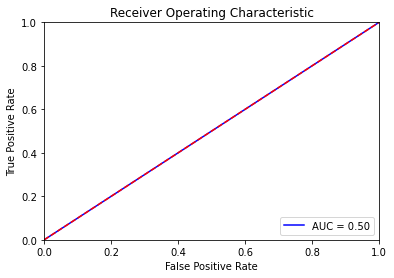

In [272]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba_lgr[:,1])
roc_auc = metrics.auc(fpr, tpr)


# plot auc
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])
plt.ylim([0, 1])

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('Receiver Operating Characteristic')

plt.legend(loc = 'lower right')

plt.show()

In [195]:
xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=50, evals=eval_list, verbose_eval=5)

NameError: name 'xgb' is not defined

### Задание 5  
  
* Используйте для решения задачи один из фреймворков градиентного бустинга: XGBoost, LightGDB или CatBoost.  
* Оцените на 5-fold валидации, как растет качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.  
* Настройте гиперпараметры модели на 5-fold валидации, в качестве метрики используйте F1-score. Замерьте время, затраченное на вычисления.  
* Обучите модель с настроенными параметрами на всех данных для моделирования и оцените качество на отложенной выборке. Сравните результаты с другими моделями, дайте комментарий.

In [273]:
!pip install catboost

In [274]:
import catboost

In [275]:
cat = catboost.CatBoostClassifier(iterations=500, depth=8, task_type='GPU')

In [276]:
cat.fit(X_train, y_train, eval_set=(X_test, y_test), logging_level='Verbose')

Learning rate set to 0.098517


CatBoostError: C:/Program Files (x86)/Go Agent/pipelines/BuildMaster/catboost.git/catboost/cuda/cuda_lib/cuda_base.h:281: CUDA error 35: CUDA driver version is insufficient for CUDA runtime version

In [ ]:
y_pred = cat.predict(X_test)
y_pred_proba = cat.predict_proba(X_test)
method = 'macro'
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred, average = method))
print("Precision: ", precision_score(y_test, y_pred, average = method))
print("F1: ", f1_score(y_test, y_pred, average = method))
print("ROC AUC: ", roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average = 'macro'))

##  Часть 4. Многоклассовая классификация
  
* Решите задачу многоклассовой классификации: постройте модель, пресдказывающую оценку студента по предмету по 4 балльной шкале
    - Отлично: 18 <= `G3` <= 20
    - Хорошо: 14 <= `G3` <= 17
    - Удовлетворительно: 8 <= `G3` <= 13
    - Неудовлетворительно: `G3` < 8  
  
  При решении задачи **нельзя** использовать признаки `G1` и `G2`.  
  
  
* Для решения задачи примените следующие методы:  
  * KNN  
  * Логистическая регрессия  
  * Деревья решений  
  * Random Forest
  * Gradient Boosting
  
  На кросс-валидации подберите оптимальные значения гиперпараметров алгоритмов.  
  
  
* Оцените качество моделей, используйте confusion matrix и производные от нее метрики. Сделайте выводы.    

In [277]:
from sklearn import metrics
from plot_cm import plot_confusion_matrix

def get_model_quality(test_label, preds):
    print(metrics.classification_report(test_label, preds))
    plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds), target_names=['0', '1'], normalize=True)

### KNN

In [278]:
def gr(mark):
    if 18 <= mark <= 20:
        return 4
    if 14 <= mark <= 17:
        return 3
    if 8 <= mark <= 13:
        return 2
    return 1
data['G3_gr'] =  data.loc[:, 'G3'].map(gr)
classes_names = ['Неуовлетварительно', 'Удовлетварительно',  'Хорошо',  'Отлично',]

In [279]:
y = data['G3_gr']

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [281]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix
from plot_roc import plot_roc
from plot_cm import plot_confusion_matrix

In [282]:
r2_max, neighbors_max = 0, 0
for i in range(1, 100):
    knnr = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    knnr.fit(X_train, y_train)
    y_pred = knnr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    if r2 > r2_max:
        r2_max, neighbors_max = r2, i

In [285]:
print("Accuracy:",
      round(accuracy_score(y_test, y_pred), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(y_test, y_pred), 5), 
     '\nMulticlass f1-score:',
     '\n    micro:', round(f1_score(y_test, y_pred, average='micro'), 5),
     '\n    macro:', round(f1_score(y_test, y_pred, average='macro'), 5),
     '\n    weighted:', round(f1_score(y_test, y_pred, average='weighted'), 5))

print('\n\nClassification report:\n')
print(metrics.classification_report(y_test, y_pred, digits=5))

Accuracy: 0.65217 
Balanced accuracy: 0.26462 
Multiclass f1-score: 
    micro: 0.65217 
    macro: 0.2274 
    weighted: 0.53612


Classification report:

              precision    recall  f1-score   support

           1    0.00000   0.00000   0.00000         5
           2    0.64968   0.99029   0.78462       103
           3    0.75000   0.06818   0.12500        44
           4    0.00000   0.00000   0.00000         9

    accuracy                        0.65217       161
   macro avg    0.34992   0.26462   0.22740       161
weighted avg    0.62060   0.65217   0.53612       161



C:\Users\Polina\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


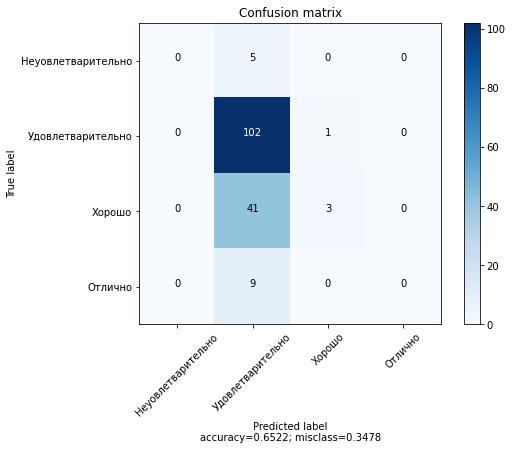

In [286]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      target_names=classes_names,
                      normalize=False)

### Logistic regression 

In [287]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize

In [288]:
lgr = LogisticRegression(max_iter=10000, multi_class='ovr')
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, multi_class='ovr')

In [289]:
y_pred = lgr.predict(X_test)

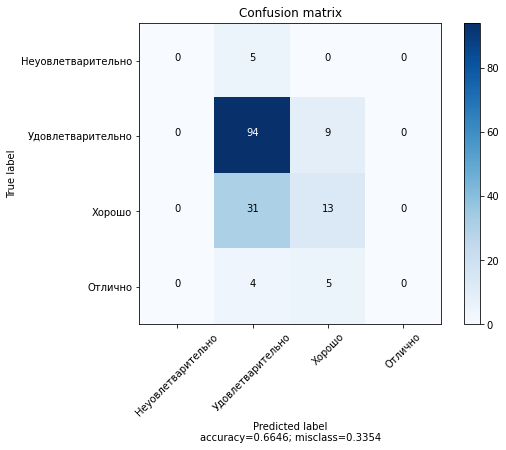

In [290]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      target_names=classes_names,
                      normalize=False)

### Random forests

In [294]:
from sklearn.model_selection import StratifiedKFold

In [295]:
params = [
    # это параметры леса
    {
        'n_estimators': [2, 5, 10, 20, 50, 100],
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2)
    },
    # это параметры дерева
    {
        'n_estimators': [1],
        'bootstrap': [False], 
        'max_depth': range(5,11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11),
        'max_features': range(2, 19, 2) 
    }
]

In [296]:
rf_model = RandomForestClassifier()

skf = StratifiedKFold(n_splits=5, shuffle=True)

clf = GridSearchCV(rf_model, params, cv=skf, scoring='f1_micro', n_jobs=5)

In [299]:
%%time
clf.fit(X_train, y_train)

Wall time: 1h 3s


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=5,
             param_grid=[{'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [2, 5, 10, 20, 50, 100]},
                         {'bootstrap': [False], 'max_depth': range(5, 11),
                          'max_features': range(2, 19, 2),
                          'min_samples_leaf': range(1, 11),
                          'min_samples_split': range(2, 11),
                          'n_estimators': [1]}],
             scoring='f1_micro')

In [301]:
clf.best_params_

{'max_depth': 7,
 'max_features': 18,
 'min_samples_leaf': 4,
 'min_samples_split': 5,
 'n_estimators': 20}

In [305]:
rf_model = RandomForestClassifier(max_depth=7, max_features=18, min_samples_leaf=4, min_samples_split=5, n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)

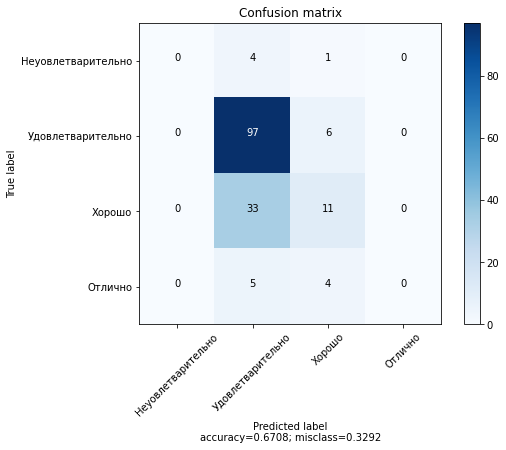

In [306]:
plot_confusion_matrix(cm=confusion_matrix(y_test, y_pred),
                      target_names=classes_names,
                      normalize=False)

Лучше всего все модели предсказали оценки хорошо и удовлетварительно.

Ни один GradientBoosting не удалось завести:(